In [1]:
# Zemberek'i kullanabillmek için ilk önce java kütüphenelerini kullanmamızı sağlayan kütüphaneyi ekleyelim
import jpype
from jpype import JClass

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Zembrek'in jar dosyalarını okuyalım ve hangi modüller var bakalım
import zipfile

def read_jar(jar_file):
    zf = zipfile.ZipFile(jar_file, 'r')
    try:
        lst = zf.infolist()
        for zi in lst:
            fn = zi.filename 
            # print(fn)
    finally:
        zf.close()
        
read_jar("zemberek-full.jar")

In [3]:
# Zembrek'i çalıştıralım
jar = r"C:/Users/Dilemre/Documents/GitHub/bitirme/zemberek-full.jar" # Zemberek'in yolu
jvmpath = r"C:/Program Files/Java/jdk-17.0.2/bin/server/jvm.dll" # JVM'nin yolu
if not jpype.isJVMStarted():
    jpype.startJVM(jvmpath=jvmpath, classpath=jar)
    print("ok")

ok


In [4]:
# Zemberekten gerekli kütüphaneleri import edelim
try:
    TurkishTokenizer = JClass('zemberek.tokenization.TurkishTokenizer')
    Token = JClass('zemberek.tokenization.Token')
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    TurkishSpellChecker = JClass('zemberek.normalization.TurkishSpellChecker')
    WordAnalysis =  JClass('zemberek.morphology.analysis.WordAnalysis')
    TurkishSentenceExtractor = JClass('zemberek.tokenization.TurkishSentenceExtractor')
except:
    print("wrong path")

In [5]:
morphology = TurkishMorphology.createWithDefaults()
tokenizer = TurkishTokenizer.ALL
spell_checker = TurkishSpellChecker(morphology)
extractor = TurkishSentenceExtractor.DEFAULT

In [6]:
#Verilerimizi almak ve işlemek için gerekli kütüphaneler
import pandas as pd
import numpy as np
import string

In [7]:
# zemberekten aldığımız stopword dosyasını kullanarak bu kelimeleri metinlerden çıkartalım 
stopwords = [x.strip() for x in open('stop-words.txt','r', encoding="UTF8").read().split('\n')]
df = pd.read_csv("data.csv")
df.head()

,info,title,caption,link,text
0,"19 Mart 2021, Cuma",MEHMET BARLAS,Türk siyasetinde Devlet Bahçeli bir tutarlılık...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nDün MHP'nin Büyük Kurultay'ında Genel Başk...
1,"18 Mart 2021, Perşembe",MEHMET BARLAS,Amerikan iç politikasında kimin kimi hedef ala...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nAmerikan iç politikasındaki gelişmeler kes...
2,"17 Mart 2021, Çarşamba",MEHMET BARLAS,"Amerikalılar, yalancı Amerikan başkanlarını ar...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nBugüne kadar her konuda Yunanistan'ın ve K...
3,"16 Mart 2021, Salı",MEHMET BARLAS,Darbeler geçmişte Türkiye’nin dış politikasını...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,"\n\nMısır'la diplomatik ilişkilerin başlaması,..."
4,"15 Mart 2021, Pazartesi",MEHMET BARLAS,"Müflis Yunanistan, Türkiye’ye gövde gösterisi ...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nTabii ki hiçbir ülkeyi küçük görmemek gere...


In [8]:
#15'ten az köşe yazısına sahip yazar sayısı
df[df.groupby('title').title.transform('count') < 15].title.unique().size

95

In [9]:
#15'ten az köşe yazısına sahip yazarların toplam köşe yazısı sayısı
df[df.groupby('title').title.transform('count') < 15].text.size

328

In [10]:
#15'ten fazla köşe yazısına sahip yazarları data DataFrame'ine alalım ve işlemlerimize buradan devam edelim
data = df[df.groupby('title').title.transform('count') >= 15].copy()
data = data.reset_index(drop = True)
data.head()

,info,title,caption,link,text
0,"19 Mart 2021, Cuma",MEHMET BARLAS,Türk siyasetinde Devlet Bahçeli bir tutarlılık...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nDün MHP'nin Büyük Kurultay'ında Genel Başk...
1,"18 Mart 2021, Perşembe",MEHMET BARLAS,Amerikan iç politikasında kimin kimi hedef ala...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nAmerikan iç politikasındaki gelişmeler kes...
2,"17 Mart 2021, Çarşamba",MEHMET BARLAS,"Amerikalılar, yalancı Amerikan başkanlarını ar...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nBugüne kadar her konuda Yunanistan'ın ve K...
3,"16 Mart 2021, Salı",MEHMET BARLAS,Darbeler geçmişte Türkiye’nin dış politikasını...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,"\n\nMısır'la diplomatik ilişkilerin başlaması,..."
4,"15 Mart 2021, Pazartesi",MEHMET BARLAS,"Müflis Yunanistan, Türkiye’ye gövde gösterisi ...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nTabii ki hiçbir ülkeyi küçük görmemek gere...


In [11]:
data[data['title'].str.contains('FERHAT ÜNLÜ')].shape

(20, 5)

In [12]:
data[data['title'].str.contains('MEHMET BARLAS')].shape

(17, 5)

In [13]:
#toplam yazar sayımız 109
data.title.unique().size

109

In [14]:
# toplam köşe yazısı sayımız
data.text.size

2087

In [15]:
#Buradaki tüm işlemler köşe yazısı bazlı yapılır

def dataCleaning(text):
    """Satır boşluklarını kaldır, metini küçük harfe çevir, noktalama işaretlerini kaldır"""
    text = text.replace("\n", " ")
    text = text.lower()
    text = "".join([i for i in text if (i.isalnum() or i == " ")])
    return " ".join(text.split())


def removeStopwords(text):
    """Zemberek'ten aldığımız stopword kelimelerini kaldırır"""
    for word in text:
        if word in stopwords or word in string.whitespace:
            text.remove(word)
    return text


def wordTokenize(text):
    """Önişlenmiş metini kelimelere ayırır ve stopword'leri kaldırır"""
    text = text.split(" ")
    text = removeStopwords(text)
    return text


def sentTokenize(text):
    """Önişlenmemiş metini cümlelerine ayırır, bunişlem sırasında önişleme yapar ve stopword'leri kaldırır """
    sent_list = []
    text = text.replace("\"", "")
    results: TurkishSentenceExtractor = extractor.fromDocument(jpype.JString(text))
    for result in results:
        result = dataCleaning(str(result))
        result = removeStopwords(result.split(" "))
        if len(result) == 0:
            continue
        else:
            sent_list.append(" ".join(result))         
    return sent_list


# unk kelime sayısı da nitelik olarak eklenmeli -yabancı kelime sayısı özniteliği-
def lemmas(word_list):
    """Kelime token'larından kök tokenları oluşturur"""
    lemma = []
    for word in word_list:
        result = str(morphology.analyzeAndDisambiguate(word).bestAnalysis()[0].getLemmas()[0])
        if result == "UNK":
            lemma.append(result)
        else:
            lemma.append(result)
    return lemma


def wtDist(wt):
    """Kelimelerin dağılımları"""
    wt_dist = dict()
    wt_dist.fromkeys(set(wt))
    for i in set(wt):
        wt_dist[i] = wt.count(i)
    return wt_dist


def wtLenDist(wt):
    """Kelimelerin harf olarak uzunluk dağılımlarını çıkarır"""
    wt_len = [len(str(word)) for word in wt]
    wt_len_dist = dict()
    wt_len_dist.fromkeys(range(1, 29))
    for i in range(0, 29):
        wt_len_dist[i] = wt_len.count(i)
    return wt_len_dist


def stLenDist(st):
    "Cümlelerin kelime olarak uzunluk dağılımlarını çıkarır"
    st_len = [len(wordTokenize(sent)) for sent in st]
    st_len_dist = dict()
    st_len_dist.fromkeys(range(1, 29))
    for i in range(0, 29):
        st_len_dist[i] = st_len.count(i)
    return st_len_dist


def typeTokenRatio(wt):
    """Kelimenin toplam kelime sayısına oranı"""
    return len(set(wt))/len((wt))


def avgWtLen(wt):
    """Ortalama kelime uzunluğu"""
    return sum(len(word) for word in wt)/len(wt)


def avgStLen(st):
    """Kelime olarak ortalama cümle uzunluğu"""
    return sum(len(wordTokenize(sent)) for sent in st)/len(st)


def puncNum(txt):
    """Noktalama işareti sayısı"""
    return len([x for x in txt if x in string.punctuation])


def numStopwords(clean_text):
    """Stopword kullanma sayısı"""
    return len([w for w in clean_text.split() if w in stopwords])


def numUpper(raw_text):
    """Tamamı büyük harf olan kelime sayısı"""
    p = string.punctuation + "’" + "“" + "”"
    raw_text = ''.join(' ' if c in p else c for c in raw_text)
    return len([w for w in raw_text.split() if str(w).isupper()])


# Noktalama işareti dağılımı eklenebilir.
# Eklerin dağılımı -veya bazı eklerin sayısı (özellikle iyelik ekleri)- eklenebilir.

In [32]:
data['clean_text'] = data['text'].apply(lambda x : dataCleaning(x))
data['word_token'] = data['clean_text'].apply(lambda x : wordTokenize(x))
data['sent_token'] = data['text'].apply(lambda x : sentTokenize(x))
data['lemma_token'] = data['word_token'].apply(lambda x : lemmas(x))
data['ltDist'] = data['lemma_token'].apply(lambda x : wtDist(x))
data['wtLenDist'] = data['word_token'].apply(lambda x : wtLenDist(x))
data['stLenDist'] = data['sent_token'].apply(lambda x : stLenDist(x))
data['ttr'] = data['word_token'].apply(lambda x : typeTokenRatio(x))
data['lttr'] = data['lemma_token'].apply(lambda x : typeTokenRatio(x))
data['avgWtLen'] = data['word_token'].apply(lambda x : avgWtLen(x))
data['avgStLen'] = data['sent_token'].apply(lambda x : avgStLen(x))
data['puncNum'] = data['text'].apply(lambda x : puncNum(x))
data['numStopwords'] = data['clean_text'].apply(lambda x : numStopwords(x))
data['numUpper'] = data['text'].apply(lambda x : numUpper(x))

# yazarları tam sayı olarak kodlar ve tam sayı-yazar sözlüğü oluşturur
data['target'], mapping = pd.factorize(data.title)

In [33]:
mapping[11]

'FERHAT ÜNLÜ'

In [34]:
data.head()

,info,title,caption,link,text,clean_text,word_token,sent_token,lemma_token,ltDist,wtLenDist,stLenDist,ttr,lttr,avgWtLen,avgStLen,puncNum,numStopwords,numUpper,target
0,"19 Mart 2021, Cuma",MEHMET BARLAS,Türk siyasetinde Devlet Bahçeli bir tutarlılık...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nDün MHP'nin Büyük Kurultay'ında Genel Başk...,dün mhpnin büyük kurultayında genel başkan dev...,"[mhpnin, büyük, kurultayında, genel, başkan, d...",[mhpnin büyük kurultayında genel başkan devlet...,"[mhp, büyük, kurultay, genel, başkan, devlet, ...","{'aç': 1, 'mümkün': 1, 'isim': 1, 'kurultay': ...","{0: 0, 1: 0, 2: 3, 3: 15, 4: 10, 5: 21, 6: 33,...","{0: 0, 1: 1, 2: 3, 3: 2, 4: 2, 5: 1, 6: 2, 7: ...",0.873684,0.710526,7.184211,7.869565,61,57,12,0
1,"18 Mart 2021, Perşembe",MEHMET BARLAS,Amerikan iç politikasında kimin kimi hedef ala...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nAmerikan iç politikasındaki gelişmeler kes...,amerikan iç politikasındaki gelişmeler kesinli...,"[amerikan, iç, politikasındaki, gelişmeler, bi...",[amerikan iç politikasındaki gelişmeler bizimk...,"[amerikan, iç, politika, geliş, biz, ilgi, çek...","{'saygı': 1, 'seçim': 7, 'alan': 1, 'isim': 1,...","{0: 0, 1: 2, 2: 6, 3: 12, 4: 30, 5: 48, 6: 36,...","{0: 0, 1: 1, 2: 2, 3: 2, 4: 1, 5: 0, 6: 2, 7: ...",0.826531,0.595238,7.102041,10.000000,76,79,3,0
2,"17 Mart 2021, Çarşamba",MEHMET BARLAS,"Amerikalılar, yalancı Amerikan başkanlarını ar...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nBugüne kadar her konuda Yunanistan'ın ve K...,bugüne kadar her konuda yunanistanın ve kıbrıs...,"[bugüne, konuda, yunanistanın, kıbrıs, rumları...",[bugüne her konuda yunanistanın kıbrıs rumları...,"[bugün, konu, yunanistan, kıbrıs, rum, ol, ame...","{'sal': 2, 'kamuoyu': 1, 'tarih': 1, 'birleşik...","{0: 0, 1: 0, 2: 6, 3: 8, 4: 13, 5: 26, 6: 25, ...","{0: 0, 1: 0, 2: 2, 3: 1, 4: 5, 5: 4, 6: 1, 7: ...",0.906593,0.681319,7.340659,7.217391,59,61,3,0
3,"16 Mart 2021, Salı",MEHMET BARLAS,Darbeler geçmişte Türkiye’nin dış politikasını...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,"\n\nMısır'la diplomatik ilişkilerin başlaması,...",mısırla diplomatik ilişkilerin başlaması ülkel...,"[mısırla, diplomatik, ilişkilerin, başlaması, ...",[mısırla diplomatik ilişkilerin başlaması ülke...,"[mısır, diplomatik, ilişki, başla, ülke, dış, ...","{'meclis': 1, 'birleşik': 1, 'müttefik': 1, 'd...","{0: 0, 1: 0, 2: 5, 3: 4, 4: 12, 5: 20, 6: 22, ...","{0: 0, 1: 0, 2: 3, 3: 0, 4: 1, 5: 0, 6: 0, 7: ...",0.810000,0.595000,7.765000,10.263158,56,47,0,0
4,"15 Mart 2021, Pazartesi",MEHMET BARLAS,"Müflis Yunanistan, Türkiye’ye gövde gösterisi ...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nTabii ki hiçbir ülkeyi küçük görmemek gere...,tabii ki hiçbir ülkeyi küçük görmemek gerekiyo...,"[tabii, hiçbir, ülkeyi, küçük, görmemek, gerek...","[tabii hiçbir ülkeyi küçük görmemek gerekiyor,...","[tabii, hiçbir, ülke, küçük, gör, gerek, bazı,...","{'düzenle': 1, 'twitter': 1, 'uçak': 7, 'bae':...","{0: 0, 1: 7, 2: 6, 3: 11, 4: 26, 5: 47, 6: 26,...","{0: 0, 1: 0, 2: 2, 3: 1, 4: 3, 5: 1, 6: 1, 7: ...",0.800000,0.608000,6.936000,11.523810,67,56,12,0


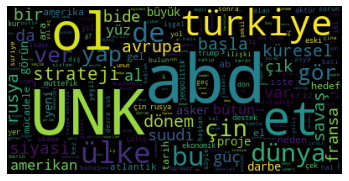

In [35]:
#Bazı eğlenceli görselleştirmeler
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = WordCloud(
    max_font_size = 80
).generate(
    " ".join(
        " ".join(lemma) for lemma in data[data.title == "BERCAN TUTAR"]["lemma_token"])
)

plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [43]:
#Modelimiz yazarları tahin edecek, kodlanmış kısımı y'ye atıyoruz.
y = np.array(data.target)
#Öznitelikler x'e atılır.
x = data.loc[:, 'text' : 'numUpper']

In [44]:
#Verilerimizi train ve test olarak böleriz
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state = 42)
x_train.reset_index(inplace=True)
x_test.reset_index(inplace=True)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import MinMaxScaler

In [46]:
#train verilerimizi vektörleştirelim
scaler = MinMaxScaler()
normalizedLabels = scaler.fit_transform(x_train.loc[:, 'ttr':'numUpper'])

#kökleri tek bir string metin (corpus) olarak birleştiririz
train_corpus = np.array(x_train.lemma_token)
for i in range(0, len(x_train.lemma_token)):
    train_corpus[i] = " ".join(x_train.lemma_token[i])
    
len(train_corpus)

#bag of word vektörü
count_vectorize = CountVectorizer()
sparce_matrix = count_vectorize.fit_transform(train_corpus).toarray()
sparce_matrix = (sparce_matrix - sparce_matrix.min())/(sparce_matrix.max() - sparce_matrix.min())

# tf-idf vektörü
tfidf_vector = TfidfVectorizer()
tfidf_matrix = tfidf_vector.fit_transform(train_corpus).toarray()

#kelime-cümle dağılım vektörleri
wtDict_vector = DictVectorizer()
stDict_vector = DictVectorizer()
wtLenDist_matrix = wtDict_vector.fit_transform(x_train.wtLenDist).toarray()
stLenDist_matrix = stDict_vector.fit_transform(x_train.stLenDist).toarray()
wtLenDist_matrix = (wtLenDist_matrix - wtLenDist_matrix.min())/(wtLenDist_matrix.max() - wtLenDist_matrix.min())
stLenDist_matrix = (stLenDist_matrix - stLenDist_matrix.min())/(stLenDist_matrix.max() - stLenDist_matrix.min())

#bütün vektörlerin birleştirelim
attribution = (tfidf_matrix, sparce_matrix, wtLenDist_matrix, stLenDist_matrix, normalizedLabels) 
attribution = np.concatenate(attribution, axis = 1)
X_train = attribution

In [47]:
#vektör modellerini kaydedelim
import pickle
with open('./model/mapping.pkl', 'wb') as f:
    pickle.dump(mapping, f)

with open('./model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    
with open('./model/count_vectorize.pkl', 'wb') as f:
    pickle.dump(count_vectorize, f)
    
with open('./model/tfidf_vector.pkl', 'wb') as f:
    pickle.dump(tfidf_vector, f)
    
with open('./model/wtDict_vector.pkl', 'wb') as f:
    pickle.dump(wtDict_vector, f)
    
with open('./model/stDict_vector.pkl', 'wb') as f:
    pickle.dump(stDict_vector, f)

In [48]:
#oluştruduğumuz vektör modelleri ile test veri setini vektörleştirelim
test_normalizedLabels = scaler.transform(x_test.loc[:, 'ttr':'numUpper'])

test_corpus = np.array(x_test.lemma_token)
for i in range(0, len(x_test.lemma_token)):
    test_corpus[i] = " ".join(x_test.lemma_token[i])
    
test_sparce_matrix = count_vectorize.transform(test_corpus).toarray()
test_sparce_matrix = (test_sparce_matrix - test_sparce_matrix.min())/(test_sparce_matrix.max() - test_sparce_matrix.min())

test_tfidf_matrix = tfidf_vector.transform(test_corpus).toarray()

test_wtLenDist_matrix = wtDict_vector.transform(x_test.wtLenDist).toarray()
test_stLenDist_matrix = stDict_vector.transform(x_test.stLenDist).toarray()
test_wtLenDist_matrix = (test_wtLenDist_matrix - test_wtLenDist_matrix.min())/(test_wtLenDist_matrix.max() - test_wtLenDist_matrix.min())
test_stLenDist_matrix = (test_stLenDist_matrix - test_stLenDist_matrix.min())/(test_stLenDist_matrix.max() - test_stLenDist_matrix.min())

test_attribution = (test_tfidf_matrix, test_sparce_matrix, test_wtLenDist_matrix, test_stLenDist_matrix, test_normalizedLabels) 
test_attribution = np.concatenate(test_attribution, axis = 1)
X_test = test_attribution

# SVM default parameters:

    C = 1.0
    kernel = rbf
    degree = 3
    gamma = scale
    coef0 = 0.0
    shrinking = True
    probability = False
    tol = 1e-3
    cache_size = 200
    class_weight = None
    verbose = False
    max_iter = 1
    decision_function_shape = ovr
    break_tiles = False
    random_state = None

In [49]:
import time
from sklearn.svm import SVC
from sklearn import metrics

#sss = StratifiedShuffleSplit(n_splits=5, random_state=42)
svm_classifier = SVC()

start = time.time() 
svm_classifier.fit(X_train,y_train)
#result = cross_val_score(svm_classifier, x, y, cv = sss)
end = time.time()

process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))
#print("Avg accuracy: {}".format(result.mean()))


pred_svm = svm_classifier.predict(X_test)
ACC_svm = metrics.accuracy_score(y_test,pred_svm)    
print("Accuracy = %"+ str(ACC_svm*100))

Support Vector Machine Classifier has fitted, this process took 49.11 seconds
Accuracy = %55.00725689404935


In [27]:
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

In [28]:
# Hiper parametre ayarlaması

rng = np.random.RandomState(0)
tuned_parameters = [{'kernel': ['rbf'],
                     'C': loguniform(1e0, 1e3),
                     'gamma': loguniform(1e-4, 1e-2),
                     'class_weight':['balanced', None]},
                    {'kernel': ['linear'], 
                     'C': loguniform(1e0, 1e3)},
                    {'kernel': ['poly'],
                     'gamma': loguniform(1e-4, 1e-2),
                     'degree' : [2, 3, 4],
                     'C': loguniform(1e0, 1e3)},
                    {'kernel': ['sigmoid'],
                     'gamma': loguniform(1e-4, 1e-2),
                     'C': loguniform(1e0, 1e3)}]

rsc = RandomizedSearchCV(
        estimator=svm_classifier,
        param_distributions=tuned_parameters,
        n_iter = 30,
        cv=10,
        random_state=rng).fit(X_train,y_train)

In [29]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (rsc.best_params_, rsc.best_score_)
)

The best parameters are {'C': 216.00820741402038, 'kernel': 'linear'} with a score of 0.80


In [50]:
# hiper parametre ayarlaması yapılmış svm

import time
from sklearn.svm import SVC
from sklearn import metrics

tuned_svm_classifier = SVC(C = 216.00820741402038, kernel = 'linear')

start = time.time() 
tuned_svm_classifier.fit(X_train,y_train)
end = time.time()

process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

t_pred_svm = tuned_svm_classifier.predict(X_test)
t_ACC_svm = metrics.accuracy_score(y_test,t_pred_svm)    
print("Accuracy = %"+ str(t_ACC_svm*100))

Support Vector Machine Classifier has fitted, this process took 44.53 seconds
Accuracy = %80.11611030478954


In [51]:
#svm modelini kaydedelim
with open('./model/SVM.pkl', 'wb') as f:
    pickle.dump(tuned_svm_classifier, f)

In [ ]:
#tekrar modeli yükleyerek çalıştırmayı deneyelim
with open('./model/SVM.pkl', 'rb') as f:
    reloaded_model = pickle.load(f)
    
r_pred_svm = reloaded_model.predict(X_test)
r_ACC_svm = metrics.accuracy_score(y_test,r_pred_svm)    
print("Accuracy = %"+ str(r_ACC_svm*100))

In [ ]:
new_pred = reloaded_model.predict(X_train)
new_acc = metrics.accuracy_score(y_train,new_pred)    

print("Accuracy = %"+ str(new_acc*100))

(109.0, 0.0)

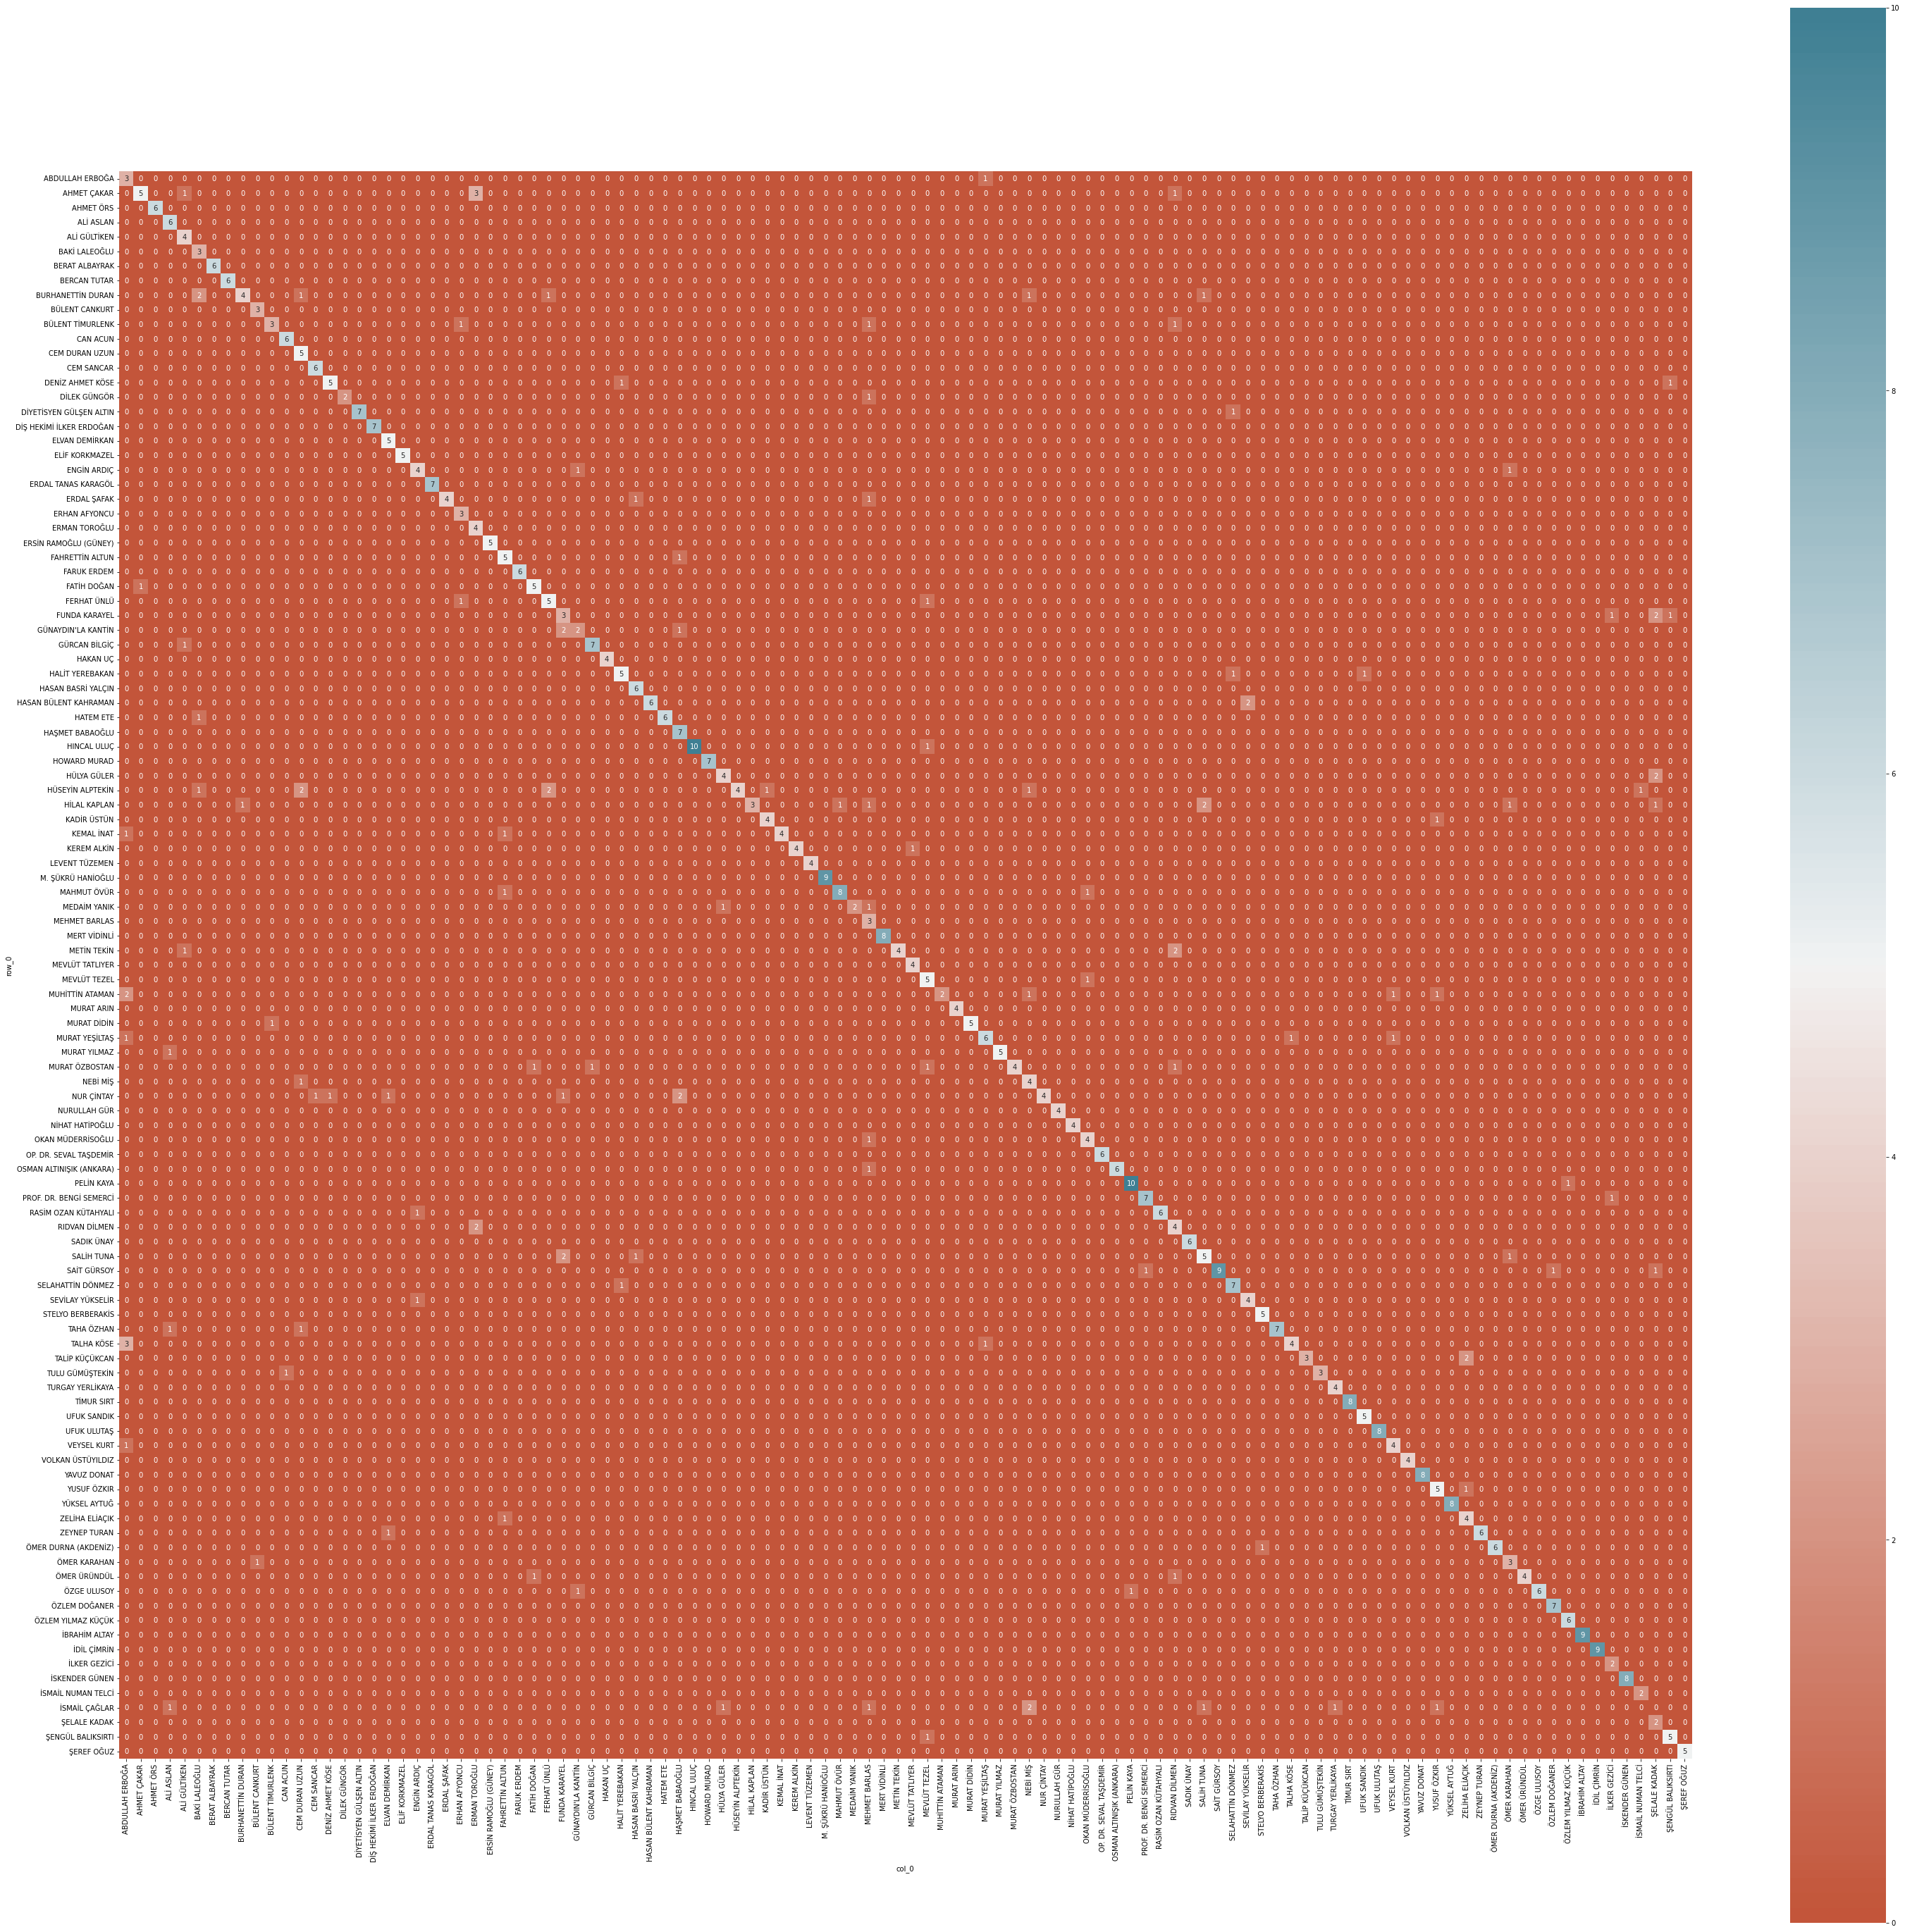

In [39]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns;
plt.figure(figsize = (50,50))
cm = pd.crosstab(mapping[y_test], mapping[r_pred_svm])
ax = sns.heatmap(cm, vmin = 0, vmax = 10, center = 5, 
                 cmap = sns.diverging_palette(20, 220, n = 200),  
                 square = True, annot = True)

ax.set_ylim([cm.shape[0],0])

In [ ]:
fig.savefig("cm.png") 

* 
* 
* 
* 
* 
* 
* 

# MLP default parameters:

    hidden_layer_sizes=(100,)
    activation='relu'
    solver='adam'
    alpha=0.0001
    batch_size='auto'
    learning_rate='constant'
    learning_rate_init=0.001
    power_t=0.5
    max_iter=200
    shuffle=True
    random_state=None
    tol=0.0001
    verbose=False
    warm_start=False
    momentum=0.9
    nesterovs_momentum=True
    early_stopping=False
    validation_fraction=0.1
    beta_1=0.9
    beta_2=0.999
    epsilon=1e-08
    n_iter_no_change=10
    max_fun=15000

In [40]:
#MLP ile deneyelim
from sklearn.neural_network import MLPClassifier
from sklearn import metrics


mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train,y_train)

pred_mlp = mlp_classifier.predict(X_test)
ACC_mlp = metrics.accuracy_score(y_test, pred_mlp)
print("Accuracy = %"+ str(ACC_mlp*100))

Accuracy = %76.48766328011611


In [57]:
from sklearn.model_selection import GridSearchCV

GRID = [
    {'solver': ['sgd', 'adam', 'lbfgs'],
     'learning_rate_init': [0.0001],
     'learning_rate': ['constant','adaptive'],
     'max_iter': [300],
     'hidden_layer_sizes': [(500, 400, 300, 200, 100), (400, 400, 400, 400, 400), 
                            (300, 300, 300, 300, 300), (200, 200, 200, 200, 200)],
     'activation': ['logistic', 'tanh', 'relu'],
     'alpha': stats.uniform(0.0001, 0.9),
     'early_stopping': [True, False]
}]


In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=GRID,  
                            n_jobs=-1, cv=10, refit=True, verbose=1)

gs = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [ ]:
print(
    "The best parameters are %s with a score of %0.2f"
    % (gs.best_params_, gs.best_score_)
)

* 
* 
* 
* 
* 

# LSTM

In [ ]:
import tensorflow as tf
x_train, x_test = X_train.reshape(-1, 1, 37414), X_test.reshape(-1, 1, 37414)

In [45]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Adding an early stopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10, #Stop the model training if validation accuracy doesnt increase in 10 consecutive Epochs
                   restore_best_weights=True)


In [44]:
#LSTM ile deneyelim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping


model=Sequential()

model.add(SpatialDropout1D(0.4))
model.add(LSTM(256, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(74, activation='relu', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(data.title.unique()), activation='softmax'))

In [46]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[es], validation_data=(x_test, y_test))

Epoch 1/100
44/44 [==============================] - 44s 467ms/step - loss: 4.6920 - accuracy: 0.0057 - val_loss: 4.6926 - val_accuracy: 0.0044
Epoch 2/100
44/44 [==============================] - 22s 492ms/step - loss: 4.6909 - accuracy: 0.0072 - val_loss: 4.6939 - val_accuracy: 0.0058
Epoch 3/100
44/44 [==============================] - 16s 372ms/step - loss: 4.6902 - accuracy: 0.0072 - val_loss: 4.6952 - val_accuracy: 0.0044
Epoch 4/100
44/44 [==============================] - 17s 376ms/step - loss: 4.6887 - accuracy: 0.0136 - val_loss: 4.6927 - val_accuracy: 0.0087
Epoch 5/100
44/44 [==============================] - 15s 350ms/step - loss: 4.5223 - accuracy: 0.0122 - val_loss: 4.3444 - val_accuracy: 0.0232
Epoch 6/100
44/44 [==============================] - 15s 334ms/step - loss: 4.2249 - accuracy: 0.0179 - val_loss: 4.1843 - val_accuracy: 0.0319
Epoch 7/100
44/44 [==============================] - 15s 343ms/step - loss: 4.0316 - accuracy: 0.0300 - val_loss: 4.1435 - val_accuracy:

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spatial_dropout1d (SpatialD  (None, 1, 32102)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 1, 256)            33135616  
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            197120    
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            131584    
                                                                 
 lstm_3 (LSTM)               (None, 74)                60088     
                                                                 
 dense (Dense)               (None, 109)               8175      
                                                        

In [48]:
model.evaluate(x_test, y_test)

22/22 [==============================] - 2s 79ms/step - loss: 5.1127 - accuracy: 0.3628


[5.112668991088867, 0.36284470558166504]

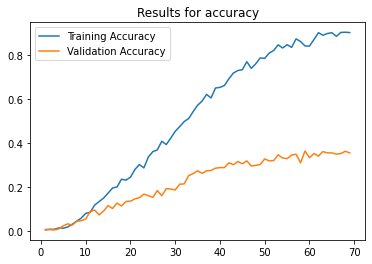

In [49]:
for i in ['accuracy']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()